In [1]:
import pandas as pd
from src.data.dataset import GlossSeq2PolishDataset
import seaborn as sns
from matplotlib import pyplot as plt
from pprint import pprint
from src.data.utils import iter_dto_as_dicts
import numpy as np

In [2]:
dataset = GlossSeq2PolishDataset()

In [3]:
polish_annotations = (record.polish_annotation for record in dataset)
polish_df = pd.DataFrame.from_records(iter_dto_as_dicts(polish_annotations))
polish_df

,start,end,text,doc_filepath,video_filename,task_label
0,39040,41120,"Myślę, że mam inny pomysł, można?",/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15
1,41120,49680,"Chyba ten znak mówi, że jak ktoś będzie spacer...",/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15
2,49680,55280,Trzeba przejść łukiem obok leżącego i o tym zn...,/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15
3,61280,66840,"Okrągły znak pomaga nam, mówi, że są pasy na u...",/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15
4,66840,73200,"Jak ktoś zobaczy, ale zignoruje ten znak, to m...",/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15
...,...,...,...,...,...,...
39618,248960,250320,[uderzanie w coś],/13/K17BF13-26_13_13_comics.eaf,K17BF13-26.mp4,13
39619,279560,291400,Kot zobaczył w akwarium rybkę. Podszedł i dał ...,/13/K17BF13-26_13_13_comics.eaf,K17BF13-26.mp4,13
39620,291400,347120,"Zjadłam, zjadłam.",/13/K17BF13-26_13_13_comics.eaf,K17BF13-26.mp4,13
39621,347120,356440,"Zając biegnie, zobaczył wiszące pranie. Wskocz...",/13/K17BF13-26_13_13_comics.eaf,K17BF13-26.mp4,13


Text(0, 0.5, 'Liczba')

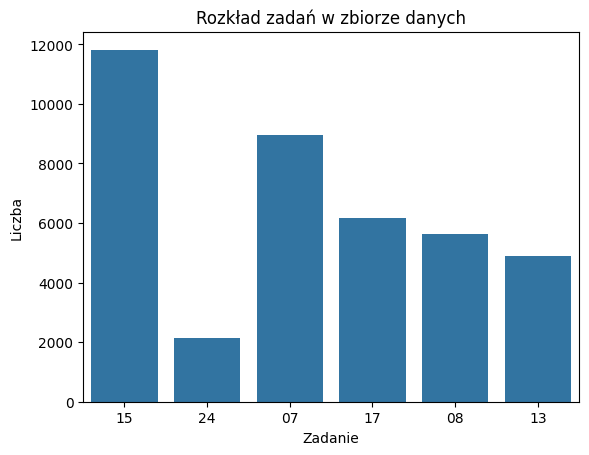

In [5]:
sns.countplot(x="task_label", data=polish_df)
plt.title("Rozkład zadań w zbiorze danych")
plt.xlabel("Zadanie")
plt.ylabel("Liczba")

In [7]:
polish_df["video_filename"].nunique()

281

In [4]:
import pl_core_news_lg

nlp = pl_core_news_lg.load()

In [5]:
docs = nlp.pipe(polish_df["text"].tolist())

In [6]:
unique_sentences, unique_tokens = set(), set()
for doc in docs:
    for sent in doc.sents:
        unique_sentences.add(sent)
        for token in sent:
            unique_tokens.add(token)
print(f"Total sentences: {len(unique_sentences):,}")
print(f"Total tokens: {len(unique_tokens):,}")

Total sentences: 41,958
Total tokens: 286,036
